# **ATTENTION IS ALL YOU NEED**

## **1. Encoder và decoder**

Máy tính không thể học từ dữ liệu thô file text, âm thanh, video. Cần mã hóa thông tin dưới dạng số và từ dạng số giải mã kết quả đầu ra.
- **Encoder**: Là phrase chuyển input thành những features learning có khả năng học tập các task. Đối với model Neural Network, Encoder là các hidden layer. Đối với model CNN, Encoder là chuỗi các layers `Convolutional + Maxpooling`. Model RNN quá trình Encoder chính là các layers `Embedding` và `Recurrent Neural Network`.
- **Decoder**: Đầu ra của encoder chính là đầu vào của Decoder. Phrase này nhằm mục đích tìm ra các phân số xác xuất từ các features learning ở Encoder từ đó xác định label của đầu ra. Kết quả có thể là nhãn đối với model classification hoặc một chuỗi các nhẵn đối với model seq2seq.

RNN là model thuộc lớp seq2seq. Các kỹ thuật RNN với nhiều cấu truc được giới thiệu `LSTM, GRU` để khắc phục hạn chế về khả năng học phụ thuộc dài hạn. Tuy nhiên trong nhiều bài toán về dịch thuật, việc cải thiện không đáng kể. Kỹ thuật `Attetion` được áp dụng và mang lại hiệu quả cao hơn

Mô hình seq2seq là mô hình chuỗi nên có thứ tự về thời gian. Trong một tác vụ dịch máy, các từ ở input sẽ có mối liên hệ lớn hơn đối với từ ở output cùng vị trí. Do đó attention hiểu một cách đơn giản sẽ giúp thuật toán điều chỉnh sự tập trung lớn hơn ở các cặp từ (input, output) nếu chúng có vị trí tương đương hoặc gần tương đương.

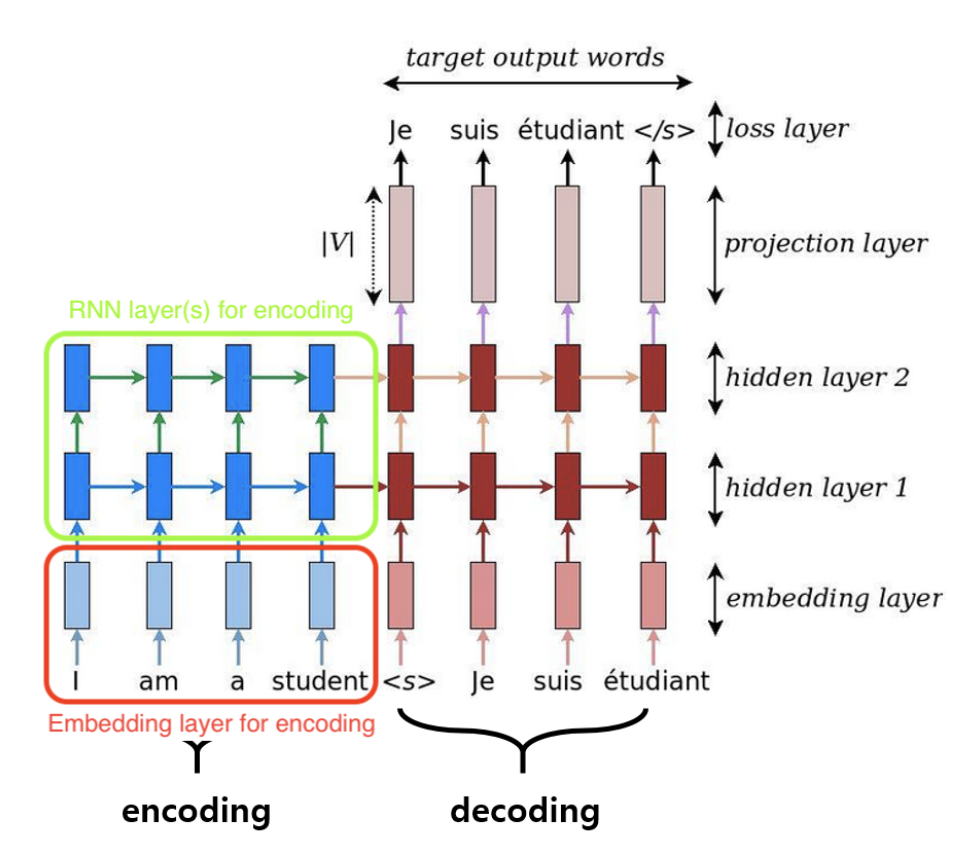

**Hình 1:** Mô hình Seq2Seq khi chưa có Attention 

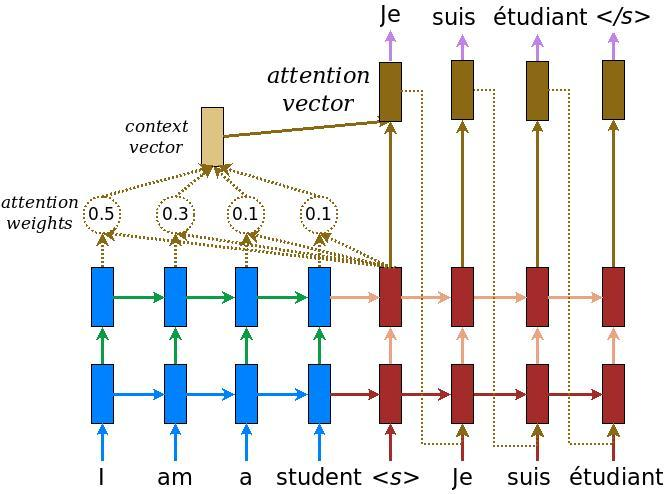

**Hình 2:** Mô hình Seq2Seq khi có Attention 

Trong hình 2, từ 'I' trong tiếng anh tương ứng 'Je' trong tiếng Pháp. Do đó attention layer điều chỉnh một trọng số $\alpha$ lớn hơn ở context vector so với các từ khác

Màu xanh là encoder và màu đỏ đại diện cho decoder. Các thẻ màu xanh chính là các hidden state $h_t$ được trả ra ở mỗi unit. `Context vector` chính là tổ hợp tuyến tính của các output theo trọng số attention. Ở vị trí thứ nhất của phase decoder thì context vector sẽ phân bố trọng số attention cao hơn so với các vị trí còn lại. Điều đó thể hiện rằng vector context tại mỗi time step sẽ ưu tiên bằng cách đánh trọng số cao hơn cho các từ cùng vị trí time step. Ưu điểm khi sử dụng attention đó là lấy toàn bộ bối cảnh của một câu thay vì chỉ 1 từ input so với model ở hình 1 khi không có attention layer. Quy trình xây dựng attention layer:

**Bước 1.** Đầu tiên tại time step thứ $t$ ta tính ra list các điểm số, mỗi điểm tương ứng với một cặp vị trí input `t` và các vị trí còn lại theo công thức bên dưới: 
$$score(h_t,\overline{h_s})$$
Ở đây $h_t$ cố định tại time step t và là hidden state của từ mục tiêu thứ t ở phase decoder, $\overline{h_s}$ là hidden state của từ thứ s trong phase encoder. Công thức để tính score có thể là dot product hoặc cosine similarity tùy vào lựa chọn.

**Bước 2:** Các scores sau bước 1 chưa được chuẩn hóa. Để tạo thành một phân phối xác xuất chúng ta đi qua hàm softmax khi đó ta thu được các trọng số attention weight 

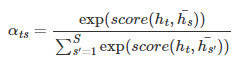

$a_{ts}$ là phân phối attention (attention weight) của các từ trong input tới các từ ở vị trí $t$ trong output hoặc target.

**Bước 3:** Kết hợp vector phân phối xác xuất $a_{ts}$ với các vector hidden state để thu được context vector.

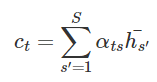

**Bước 4:** Tính attention vector để decode ra từ tương ứng ở ngôn ngữ đích. Attention vector sẽ là kết hợp của context vector và các hidden state ở decoder. Theo cách này attention vector sẽ không chỉ được học từ hidden state ở unit cuối cùng như hình 1 mà còn được học từ toàn bộ các từ ở vị trí khác thông qua context vector. Công thức tính output cho hidden state tương tự như tính đầu ra của input gate layer trong mạng RNN:
$$a_t = f(c_t,h_t) = tanh(W_c[c_t,h_t])$$ 

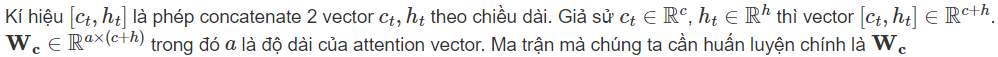

## **2. Transformer và Seq2Seq model:**


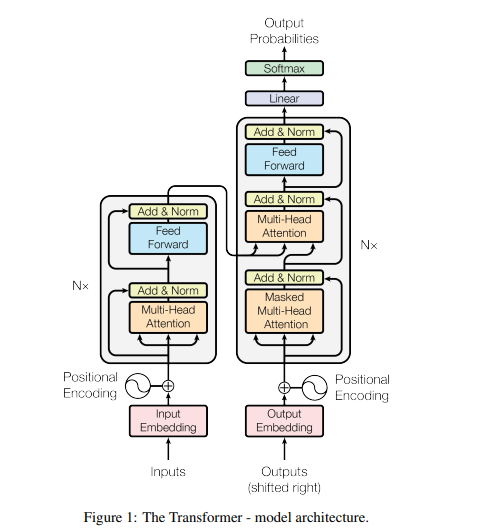

**Encoder:** Là tổng hợp xếp chồng lên nhau của 6 layer xác định . Mỗi layer bao gồm 2 layer con (sub-layer) trong đó. Sub-layer đầu tiên là multi-head self-attention, layer thứ 2 chỉ đơn thuần là các fully-connected feed-forward layer.  lưu ý là chúng ta sẽ sử dụng một kết nối residual ở mỗi sub-layer ngay sau layer normalization. Kiến trúc này có ý tưởng tương tự như mạng resnet trong CNN. Đầu ra của mỗi sub-layer là $LayerNorm(x + Sublayer(x))$ có số chiều là 512 theo như bài viết.

**Decoder:** Là tổng hợp xếp chồng của 6 layers. Kiến trúc tương tự như sub-layer ở Encoder ngoại trừ thêm 1 sub-layer thể hiện phân phối attention ở vị trí đầu tiên. Layer này không gì khác so với multi-head self-attention layer ngoại trừ được điều chỉnh để không đưa các từ trong tương lai vào attention. Tại bước thứ $i$ của decoder chúng ta chỉ biết được các từ ở vị trí nhỏ hơn $i$ nên việc điều chỉnh đảm bảo attention chỉ áp dụng cho những từ nhỏ hơn vị trí thứ i. Cơ chế residual cũng được áp dụng tương tự như trong Encoder. 

Lưu ý là chúng ta luôn có một bước cộng thêm Positional Encoding vào các input của encoder và decoder nhằm đưa thêm yếu tố thời gian vào mô hình làm tăng độ chuẩn xác. Đây chỉ đơn thuần là phép cộng vector mã hóa vị trí của từ trong câu với vector biểu diễn từ. Chúng ta có thể mã hóa dưới dạng [0, 1] vector vị trí hoặc sử dụng hàm $sin, cos$ như trong bài báo.

## **3. Cơ chế attention:**

### **3.1 Scale dot product attention**

Đây là cơ ché self attention